In [125]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [126]:
protoFile = "hand/pose_deploy.prototxt"
weightsFile = "hand/pose_iter_102000.caffemodel"
nPoints = 22
POSE_PAIRS = [ [0,1],[1,2],[2,3],[3,4],[0,5],[5,6],[6,7],[7,8],[0,9],[9,10],[10,11],[11,12],[0,13],[13,14],[14,15],[15,16],[0,17],[17,18],[18,19],[19,20] ]
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)


In [127]:
def detect_landmarks(image_path):
    frame = cv2.imread(image_path)
    frameCopy = np.copy(frame)
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    aspect_ratio = frameWidth/frameHeight

    threshold = 0.08

    # input image dimensions for the network
    inHeight = 180
    inWidth = int(((aspect_ratio*inHeight)*8)//8)
    inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)

    net.setInput(inpBlob)

    output = net.forward()
    # print("time taken by network : {:.3f}".format(time.time() - t))


    points = []

    for i in range(nPoints):
        # confidence map of corresponding body's part.
        probMap = output[0, i, :, :]
        probMap = cv2.resize(probMap, (frameWidth, frameHeight))
    
        # Find global maxima of the probMap.
        minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
        if prob > threshold :
            cv2.circle(frameCopy, (int(point[0]), int(point[1])), 4, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
            # cv2.putText(frameCopy, "{}".format(i), (int(point[0]), int(point[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)
    
            # Add the point to the list if the probability is greater than the threshold
            points.append((int(point[0]), int(point[1])))
        else :
            points.append(None)
    
    plt.figure(figsize=[4,4])
    plt.imshow(frameCopy[:,:,::-1]);plt.title("Output Image");plt.axis('off')
    plt.show()

    return points

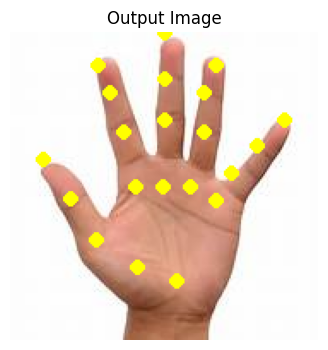

In [128]:
image_path="images/img.jpeg"
points=detect_landmarks(image_path)

In [119]:


# # Draw Skeleton
# for pair in POSE_PAIRS:
#     partA = pair[0]
#     partB = pair[1]

#     if points[partA] and points[partB]:
#         cv2.line(frame, points[partA], points[partB], (0, 255, 255), 2)
#         cv2.circle(frame, points[partA], 3, (0, 0, 255), thickness=-2, lineType=cv2.FILLED)
#         cv2.circle(frame, points[partB], 3, (0, 0, 255), thickness=-2, lineType=cv2.FILLED)

# # cv2.imshow('Output-Skeleton', frame)
# plt.imshow(frame[:,:,::-1])
# plt.show()


In [129]:
points

[(97, 145),
 (74, 137),
 (50, 121),
 (35, 97),
 (19, 74),
 (73, 90),
 (66, 58),
 (58, 35),
 (51, 19),
 (89, 90),
 (90, 51),
 (90, 27),
 (90, 0),
 (105, 90),
 (113, 58),
 (113, 35),
 (120, 19),
 (120, 98),
 (129, 82),
 (144, 66),
 (160, 51),
 None]